<a href="https://colab.research.google.com/github/lizstangle/Winter_Intensive_2021/blob/main/Final_Main_Data_Science_Intensive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING FOR IMAGE CLASSIFICATION
### The Make School Winter 2021 Data Science Intensive <br>

Instructor: Joseph Catanzarite <br>
Dates: 07 - 12 Jan 2021 


<img src="https://medmnist.github.io/assets/overview.jpg">

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/19y0pHqFsaN9-ehvCcuiXFL7FryIBXRTf?usp=sharing" 
    ><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>

</table>



## Goals
* Introduce Juniors to Make School’s Data Science concentration
* Allow Seniors an opportunity to exercise and further develop their Data Science skills





## Learning Objectives: <br>
On completion, the student will have gained familiarity with 
* The basic pattern of the data science workflow
* The TensorFlow/Keras deep learning library
* Google Colab and the magic of cloud computing

AND

* Enough knowledge to create a simple Neural Network Classifier project




# Part 1. 
## How to build a neural network to classify clothing items in the Fashion MNIST dataset
This is a modified version of the original [TensorFlow tutorial](https://www.tensorflow.org/tutorials/keras/classification).

This guide shows you how to train a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

## 1. Import the Fashion MNIST dataset

We'll work with the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to *train* the network and 10,000 images to *evaluate* how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# loaded data (train_images, train_labels, test-Images, test_labels) saved to variables 

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [4]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [5]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [7]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [8]:
len(test_labels)

10000

## 3. Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

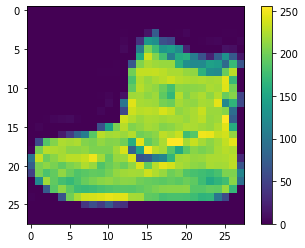

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [10]:
print("train shape is ", train_images.shape)

print("test shape is ", test_images.shape)

train_images = train_images / 255.0

test_images = test_images / 255.0

train shape is  (60000, 28, 28)
test shape is  (10000, 28, 28)


To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

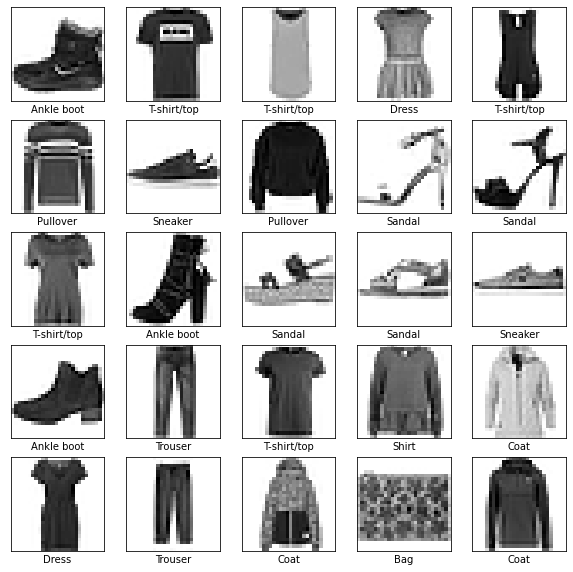

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. Build the neural network model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees in order to find the minimum of the loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the *training* data is in the `train_images` and `train_labels` arrays.
2. The model learns from the training data to associate images and labels.
3. You ask the model to make predictions about a *test* set—in this example, the `test_images` array. Given an image (say of an `ankle boot`, or a `dress`), the model does its best to predict the right label.
4. Check how well the predictions match the labels from the `test_labels` array.


### Fit the model to the data

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6209 - accuracy: 0.7823
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3429 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2970 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2809 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9059
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2414 - accuracy: 0.9114
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.233

As the model trains, the *loss* and *accuracy* metrics are displayed. <br>
Remember that during training, the model figures out how to minimize the *loss* function -- which maximizes its ability to predict labels for each image. <br> 
On the other hand, *accuracy* is a more intuitive measure of how well the model can predict image labels.<br>
This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate the accuracy

Next, compare how the model performs on the *test* dataset:

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3428 - accuracy: 0.8788

Test accuracy: 0.8787999749183655


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

The label prediction comes from the model's 10 linear outputs, which are called [logits](https://developers.google.com/machine-learning/glossary#logits). <br>

Remember that there is one output for each of the ten image classes, and that the mapping of output positions to labels is<br>
'0': 'T-shirt/top'<br>
'1': 'Trouser'<br>
'2': 'Pullover'<br>
'3': 'Dress'<br>
'4': 'Coat'<br>
'5': 'Sandal'<br>
'6': 'Shirt'<br>
'7': 'Sneaker'<br>
'8': 'Bag'<br>
'9': 'Ankle boot'<br>

As we might expect, the output with the highest *logit* value corresponds to the class label prediction of the model. <br>

So if, for a given image, the 3rd logit output is highest, the label prediction is 'Pullover'

We can make our model more interpretable by converting the *logit* outputs to *probabilities*, which tell us how confident our model is in assigning a label for each class. <br>

To accomplish this conversion of logits to class probabilites we add on a `softmax layer`.

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [18]:
predictions[34]

array([1.2052439e-11, 1.3657495e-14, 1.7435084e-10, 6.0265470e-13,
       1.1229342e-09, 1.4256887e-10, 7.5841514e-14, 2.9575129e-19,
       1.0000000e+00, 1.2226401e-21], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [19]:
np.argmax(predictions[34])

8

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [20]:
test_labels[34]

8

Graph this to look at the full set of 10 class predictions.

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions on unseen test images

With the trained model, you can predict labels for any images from the test set.<br>

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

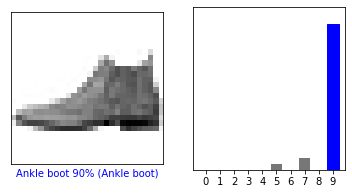

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

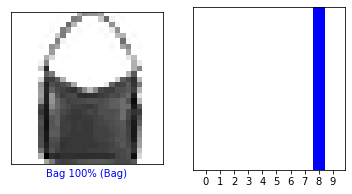

In [23]:
i = 34
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

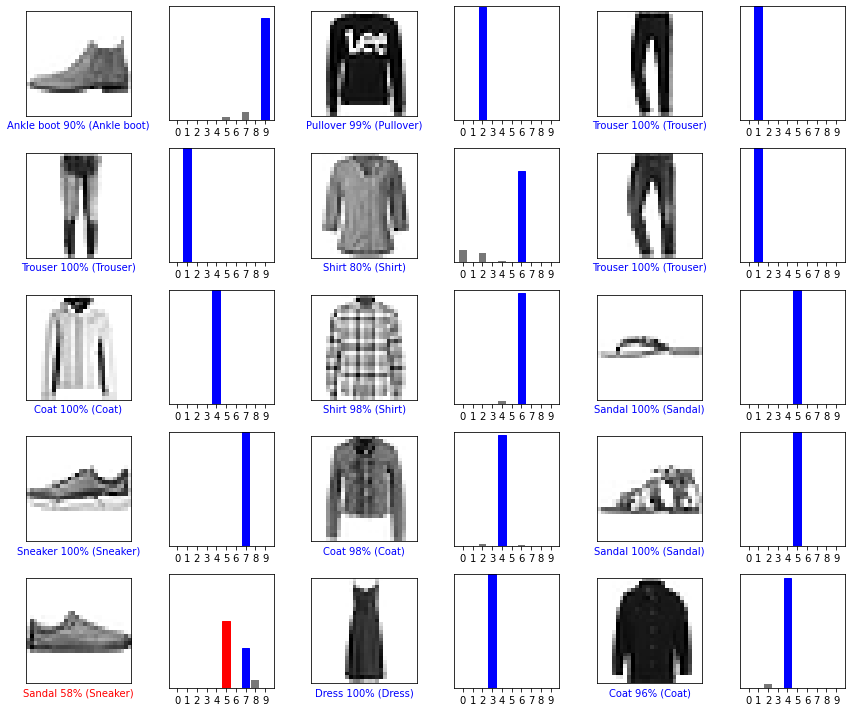

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Use the trained model

Finally, use the trained model to make a prediction about a single test image.

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.6279309e-05 8.1906290e-15 9.9367380e-01 1.7985813e-10 6.0856342e-03
  2.4766424e-15 2.1431096e-04 3.2641381e-16 1.4978266e-09 9.1850084e-15]]


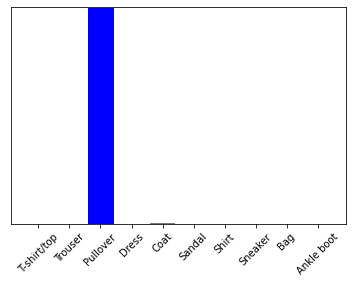

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [29]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

###You have now learned the pattern of the basic "Data Science Workflow"!<br>
This is the standard approach to any data science problem<br>
* Get and load data
* Split data into training, validation, and test data sets
* No DATA SNOOPING! *Never* look at or examine the test data until after the last step (below), when you evaluate the performance of your FINAL model!
* Explore and familiarize with the training data
* Create or select a model
* Train the model to perform well on the training data
* Use the trained model to predict on the validation data
* Improve or tune the model, using the validation data. Finalize the model.
* Evaluate the performance of the FINAL model on the test data

**bold text**
# Part 2. Experiments with Fashion MNIST (100 points)<br>

Choose any **two** of the following experiments which are the most interesting to you, and see how the accuracy of the FashionMNIST classifier is affected in each case. <br>
If it makes sense to do so, predict what you *think* will happen *before* doing the experiment. <br>
Explain what you think happened *after* doing the experiment. <br>
Modify this notebook with commented documenting your experiments.<br>

**Experiment #1** *Change the learning rate*<br>
Look up the `model.fit` method in the keras docs, and figure out how to change the `learning_rate`. Try values of `learning_rate` in [0.1, 0.01, 0.001, 0.0001, 0.00001] and make a plot of how the validation accuracy depends on the learning rate, all other things being the same.<br>

**Experiment #2** *Identify the hard-to-classify items*<br>
Find out the accuracy of your model as a function of clothing item. Which clothing item was the hardest to classify, i.e. most often misclassified? Were misclassified examples always confused with the same wrong clothing item, or were they confused with more than one other clothing item?  Examine a few misclassified examples of this hardest-to-classify clothing item. See if you can come up with an explanation of why the model has trouble classifying this clothing item?<br>

**Experiment #3** *Add a hidden layer*<br>
Look up the `model.fit` method in the keras docs, and figure out how to change the number of hidden layers in your model. Add another hidden layer to the model. How does the validation accuracy change?<br>

**Experiment #4** *Change the number of neurons*<br>
Look up the `model.fit` method in the keras docs, and figure out how to change the number of neurons in the hidden layer of your model. Change the number of neurons in your hidden layer to N, where N is in 32, 64, 256, 512. Determine how the validation accuracy depends on N and display your results in a plot or table.<br>

**Experiment #5** *Change the number of training epochs*<br>
Change the number N of training epochs systematically with N in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]and keep track of the resulting validation accuracy. At which N does the validation accuracy reach a maximum. Display your results in a plot or table.<br>

**Experiment #6** *Reduce the amount of training data*<br>
Reduce the number of training data images by N percent, where N is in [5, 10, 20, 40, 50]. How does the validation accuracy depend on N? Display your results in a plot or table.<br>

**Experiment #7** *Data Augmentation*<br>
Add horizontally "flipped versions" of the training images to the training set. How does the validation accuracy of your model change?<br>

**Experiment #8** *Downsample the images*<br>
Downsample all the images by a factor of 2, and see how the validation accuracy of your model changes.<br>

**Experiment #9** *Add noise to the images*<br>
Replace a number N of randomly chosen pixels in each training image by random numbers between 0 and 255, for N = 10, 20, 20, 30, 40, 50. How does the validation accuracy depend on N? Display your results in a plot or table.<br>



## Experiment #6 - *Data Reduction*
*We will reduce the test data by N percent and deteremine how the validation accuracy of the model depends on N. Our hypothesis is that if we reduce the training data, the validation accuracy will decrease.*

### When the data is reduced by 5%

In [52]:
train_images05 = train_images[:57000]

In [53]:
train_images05 = train_images[:57000]
train_labels05 = train_labels[:57000]

In [54]:
model.fit(train_images05, train_labels05, epochs=10)

Epoch 1/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1572 - accuracy: 0.9480
Epoch 2/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9534
Epoch 3/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9562
Epoch 4/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1178 - accuracy: 0.9583
Epoch 5/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1147 - accuracy: 0.9590
Epoch 6/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9615
Epoch 7/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1083 - accuracy: 0.9609
Epoch 8/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1040 - accuracy: 0.9622
Epoch 9/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.1017 - accuracy: 0.9624
Epoch 10/10
1782/1782 [==============================] - 4s 2ms/step - loss: 0.098

In [55]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5018 - accuracy: 0.8851

Test accuracy: 0.8851000070571899


### When the data is reduced by 10%

In [31]:
train_images10 = train_images[:54000]
train_labels10 = train_labels[:54000]

In [32]:
model.fit(train_images10, train_labels10, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2296 - accuracy: 0.9143
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2213 - accuracy: 0.9169
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2156 - accuracy: 0.9181
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2076 - accuracy: 0.9229
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2021 - accuracy: 0.9249
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1967 - accuracy: 0.9257
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1916 - accuracy: 0.9281
Epoch 8/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1852 - accuracy: 0.9303
Epoch 9/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1820 - accuracy: 0.9320
Epoch 10/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.174

In [33]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3745 - accuracy: 0.8782

Test accuracy: 0.8781999945640564


### When the data is reduced by 20%



In [35]:
train_images20 = train_images[:48000]
train_labels20 = train_labels[:48000]

In [42]:
model.fit(train_images20, train_labels20, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1481 - accuracy: 0.9475
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1305 - accuracy: 0.9521
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1261 - accuracy: 0.9536
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1231 - accuracy: 0.9551
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1171 - accuracy: 0.9567
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1140 - accuracy: 0.9579
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1122 - accuracy: 0.9589
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1099 - accuracy: 0.9596
Epoch 9/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1070 - accuracy: 0.9605
Epoch 10/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.107

In [43]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4836 - accuracy: 0.8867

Test accuracy: 0.8866999745368958


### When the data is reduced by 40%

In [36]:
train_images40 = train_images[:36000]
train_labels40 = train_labels[:36000]

In [37]:
model.fit(train_images40, train_labels40, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1718 - accuracy: 0.9352
Epoch 2/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1632 - accuracy: 0.9389
Epoch 3/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1552 - accuracy: 0.9431
Epoch 4/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1521 - accuracy: 0.9426
Epoch 5/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1474 - accuracy: 0.9451
Epoch 6/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1442 - accuracy: 0.9456
Epoch 7/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1390 - accuracy: 0.9463
Epoch 8/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1363 - accuracy: 0.9490
Epoch 9/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.1322 - accuracy: 0.9507
Epoch 10/10
1125/1125 [==============================] - 2s 2ms/step - loss: 0.128

In [44]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4836 - accuracy: 0.8867

Test accuracy: 0.8866999745368958


### When the data is reduced by 50%

In [45]:
train_images50 = train_images[:30000]
train_labels50 = train_labels[:30000]

In [46]:
model.fit(train_images50, train_labels50, epochs=10)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0827 - accuracy: 0.9696
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0773 - accuracy: 0.9714
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0782 - accuracy: 0.9718
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0733 - accuracy: 0.9735
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0725 - accuracy: 0.9735
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0699 - accuracy: 0.9741
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0697 - accuracy: 0.9746
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0697 - accuracy: 0.9744
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0659 - accuracy: 0.9751
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0631 - accuracy: 0.9769

In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5727 - accuracy: 0.8852

Test accuracy: 0.885200023651123


Test Results

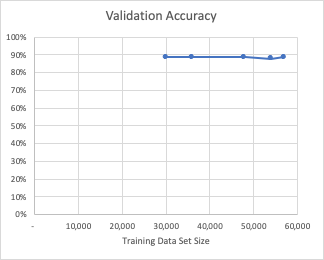  
The reduction in size of the Training Data Set does not make an impact on the validation accuracy. This may be due to the high quality of the Fashion MNIST Data Set which has examples which are easy to separate. 

## Experiment #5 - *Change in Training Epochs*
*We will change the number of training epochs, from 2 to 20 in order to determine when the validation accuracy reaches a maximum. We do not have a hypothesis for when this will be, as we do not yet understand the mathematical significance of the epochs and how they relate to validation accuracy for this data set. However, we do expect that after some number of epochs, the accuraccy will not only reach a maximum, but it will continually decrease as the algorithm will become overtrained.*

### Validation accuracy after 2 training epochs

In [56]:
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1176 - accuracy: 0.9580
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1066 - accuracy: 0.9614


In [57]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5066 - accuracy: 0.8904

Test accuracy: 0.8903999924659729


### Validation accuracy after 4 training epochs

In [58]:
model.fit(train_images, train_labels, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1052 - accuracy: 0.9620
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1021 - accuracy: 0.9627
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0979 - accuracy: 0.9638
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0957 - accuracy: 0.9650


In [59]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5239 - accuracy: 0.8899

Test accuracy: 0.8899000287055969


### Validation accuracy after 6 training epochs

In [60]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0939 - accuracy: 0.9649
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0947 - accuracy: 0.9647
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0901 - accuracy: 0.9660
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0893 - accuracy: 0.9678
Epoch 5/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9677
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0856 - accuracy: 0.9686


In [61]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5638 - accuracy: 0.8850

Test accuracy: 0.8849999904632568


### Validation accuracy after 8 training epochs

In [62]:
model.fit(train_images, train_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0840 - accuracy: 0.9695
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0839 - accuracy: 0.9686
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0820 - accuracy: 0.9700
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0802 - accuracy: 0.9700
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0803 - accuracy: 0.9700
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9711
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0778 - accuracy: 0.9712
Epoch 8/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0764 - accuracy: 0.9718


In [63]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5983 - accuracy: 0.8874

Test accuracy: 0.8873999714851379


### Validation accuracy after 10 training epochs

In [64]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0750 - accuracy: 0.9722
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0730 - accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0709 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0691 - accuracy: 0.9748
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0704 - accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0680 - accuracy: 0.9745
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9748
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0693 - accuracy: 0.9747
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.065

In [65]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.6945 - accuracy: 0.8826

Test accuracy: 0.8826000094413757


### Validation accuracy after 12 training epochs

In [66]:
model.fit(train_images, train_labels, epochs=12)

Epoch 1/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0651 - accuracy: 0.9757
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0637 - accuracy: 0.9764
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0674 - accuracy: 0.9747
Epoch 4/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0603 - accuracy: 0.9776
Epoch 5/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0621 - accuracy: 0.9768
Epoch 6/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0612 - accuracy: 0.9776
Epoch 7/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0608 - accuracy: 0.9770
Epoch 8/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0584 - accuracy: 0.9783
Epoch 9/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0577 - accuracy: 0.9783
Epoch 10/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.058

In [67]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.7469 - accuracy: 0.8876

Test accuracy: 0.8876000046730042


### Validation accuracy after 14 training epochs

In [68]:
model.fit(train_images, train_labels, epochs=14)

Epoch 1/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0561 - accuracy: 0.9787
Epoch 2/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0586 - accuracy: 0.9785
Epoch 3/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0540 - accuracy: 0.9800
Epoch 4/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0561 - accuracy: 0.9791
Epoch 5/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0541 - accuracy: 0.9797
Epoch 6/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0523 - accuracy: 0.9808
Epoch 7/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0552 - accuracy: 0.9788
Epoch 8/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0514 - accuracy: 0.9812
Epoch 9/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0506 - accuracy: 0.9812
Epoch 10/14
1875/1875 [==============================] - 3s 2ms/step - loss: 0.050

In [69]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.8421 - accuracy: 0.8856

Test accuracy: 0.8855999708175659


### Validation accuracy after 16 training epochs

In [70]:
model.fit(train_images, train_labels, epochs=16)

Epoch 1/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0450 - accuracy: 0.9831
Epoch 2/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0490 - accuracy: 0.9819
Epoch 3/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9833
Epoch 4/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9828
Epoch 5/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0473 - accuracy: 0.9821
Epoch 6/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0462 - accuracy: 0.9826
Epoch 7/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0429 - accuracy: 0.9843
Epoch 8/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0468 - accuracy: 0.9832
Epoch 9/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9848
Epoch 10/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.045

In [71]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.8983 - accuracy: 0.8867

Test accuracy: 0.8866999745368958


### Validation accuracy after 18 training epochs

In [72]:
model.fit(train_images, train_labels, epochs=16)

Epoch 1/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9835
Epoch 2/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9857
Epoch 3/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0421 - accuracy: 0.9839
Epoch 4/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9852
Epoch 5/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0415 - accuracy: 0.9850
Epoch 6/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0407 - accuracy: 0.9851
Epoch 7/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0392 - accuracy: 0.9860
Epoch 8/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0403 - accuracy: 0.9851
Epoch 9/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0404 - accuracy: 0.9852
Epoch 10/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.038

In [73]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.9716 - accuracy: 0.8826

Test accuracy: 0.8826000094413757


### Validation accuracy after 20 training epochs

In [74]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0341 - accuracy: 0.9878
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0366 - accuracy: 0.9867
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0364 - accuracy: 0.9863
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0347 - accuracy: 0.9873
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0383 - accuracy: 0.9865
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0323 - accuracy: 0.9880
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - accuracy: 0.9873
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0351 - accuracy: 0.9870
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0332 - accuracy: 0.9883
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.034

In [75]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.0897 - accuracy: 0.8805

Test accuracy: 0.8805000185966492


Test Results

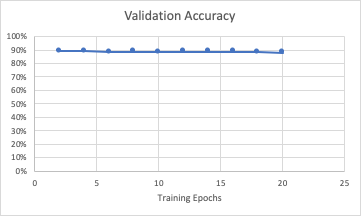

The increase in training epochs does not make an impact on the validation accuracy. This may be due to the high quality of the Fashion MNIST Data Set.

# Part 3. Mini-project: MedMNIST classifier (100 points) <br>

A. Set up your project folder and get the MedMNIST data
* If you don't already have, [Google Drive](https://www.google.com/intl/en_in/drive/), get it. <br>

* Save a copy of this notebook in Google Drive: from the File menu of this notebook, choose "Save a Copy In Drive" 
* Now you can rename your copy of the notebook to whatever name you choose
* From the File menu, choose "Locate in Drive" to see the saved copy of the notebook in your Google Drive
* Make a new folder in Google Drive called "Colab Notebooks"
* In the "Colab Notebooks" folder, make a subfolder "Make School Winter 2021 Intensive"
* Move your saved copy of the notebook file into the "Make School Winter 2021 Intensive" folder
* Download the [MedMNIST data sets](https://zenodo.org/record/4269852) and put the files into the "Make School Winter 2021 Intensive" folder
* Here is a notebook with [starter code](https://github.com/jcatanza/MakeIntensiveJan2021/blob/main/get_data.ipynb) to read  the MedMNIST data sets after you download them. Copy the starter code notebook into the "Make School Winter 2021 Intensive". 

B. Build and test a classifier for one of the MedMNIST data sets.
* Choose one of the [MedMNIST data sets](https://zenodo.org/record/4269852). Make sure to choose a different data set than your classmates. Using this notebook as a blueprint,  build, evaluate and test a classifier for that data set.<br>

* Document your code and your results in this notebook. <br>










##### Copyright 2018 The TensorFlow Authors.

Original notebook from TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# PathMNIST Classifier


This is how we will read the data sets in our code:

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# If Salo
# %cd '/content/drive/MyDrive/ColabNotebooks/Winter_Int_2021/'

# If Liz
%cd '/content/drive/My Drive/ColabNotebooks/Winter_Int_2021/'

# Then
%ls  

/content/drive/My Drive/ColabNotebooks/Winter_Int_2021
 breastmnist.npz                                  pathmnist.npz
'Liz Copy of Main_Data_Science_Intensive.ipynb'   retinamnist.npz


We need to import numpy as the datasets are in a compressed numpy file format and we need to open them.

In [ ]:
import numpy as np
import os

The datasets are then stored into a dictionary that we can acess with python in order to later be used by us.

In [ ]:
# make a list of the .npz files
files = [x for x in os.listdir() if x[-4::]=='.npz']
print('List of the MedMNIST data set files:\n',files)

# make a list of the MedMNIST data sets
data_sets = [x[:-4] for x in os.listdir() if x[-3::]=='npz']
print('\n\n','The names of the MedMNIST data sets are:\n',data_sets)

# extract the MedMNIST data sets into a dictionary named MedMNIST
MedMNIST = {file[:-4]:np.load(file) for file in files}

List of the MedMNIST data set files:
 ['pathmnist.npz', 'retinamnist.npz', 'breastmnist.npz']


 The names of the MedMNIST data sets are:
 ['pathmnist', 'retinamnist', 'breastmnist']


Our dictionaries contain key-value pairs, the keys being the names of the datasets. The key-value pairs actually are objects that contain dictionaries within themselves. In order to access these dictionaries, we need to access them via the "key" in the MedMnist dictionary as such:

In [ ]:
print('The MedMNIST dictionary entries are objects of type\n',type(MedMNIST['pathmnist']))
print('\nEach such object contains a dictionary whose keys are\n',MedMNIST['pathmnist'].files)

The MedMNIST dictionary entries are objects of type
 <class 'numpy.lib.npyio.NpzFile'>

Each such object contains a dictionary whose keys are
 ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


We will now extract each dictionary individually in order to access them later. These dictionaries contain the data sets that will be used to train the neural network classifier.

In [ ]:
train_labels = MedMNIST['pathmnist']['train_labels'].squeeze()
train_images = MedMNIST['pathmnist']['train_images'][:,:,:,0]

val_labels = MedMNIST['pathmnist']['val_labels'].squeeze()
val_images = MedMNIST['pathmnist']['val_images'][:,:,:,0]

test_labels = MedMNIST['pathmnist']['test_labels'].squeeze()
test_images = MedMNIST['pathmnist']['test_images'][:,:,:,0]

In [ ]:
# train_images_new = train_images[:,:,:,0]

In [ ]:
# print(train_images_new.shape)

Now we need to check how large our data set is in order to decide whether or not we will use it. Small data sets will yield a lesser accuracy because the algorithm will not be "trained" as much. On another note, we need to ensure that the number of labels match the number of images, otherwise our matrix will be cardinally ambiguous and we will have an error.

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(89996, 28, 28)
(89996,)


In [ ]:
print(val_images.shape)
print(val_labels.shape)

(10004, 28, 28)
(10004,)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(7180, 28, 28)
(7180,)


In this case, we can use this dataset as it contains almost 90,000 entries for training and more than 7,000 entries for testing. Also, we are sure that the data will work as there are as many labels as there are images

We will now begin to prepare the network for training. The first step is to pre-process the data. 

In [ ]:
plt.figure()
plt.imshow(train_images[89995])
plt.colorbar()
plt.grid(False)
plt.show()

NameError: ignored

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel("testing")
plt.show()

NameError: ignored

In order to set up a neural network, we need to first make layers. Layers extract information for the model to use at a later step. We can have as many or as little layers as we decide are necessary for creating models.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Before the model is ready, we need a way to tweak it in order to optimize its performance and accuracy rate. These "settings" are aded during the compiling phase of building a model.


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Now we can begin to train the model. In order to do so, we must use the fit method which will give the data to the model. It will also display the loss function, which will become minimized the more training the model has, and the accuracy which will determine approximately how accurate the model is when classifying data.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.2141 - accuracy: 0.1358
Epoch 2/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.1463 - accuracy: 0.2033
Epoch 3/10
2813/2813 [==============================] - 5s 2ms/step - loss: 2.1014 - accuracy: 0.2447
Epoch 4/10
2813/2813 [==============================] - 4s 2ms/step - loss: 2.0483 - accuracy: 0.2575
Epoch 5/10
2813/2813 [==============================] - 4s 2ms/step - loss: 2.0107 - accuracy: 0.2777
Epoch 6/10
2813/2813 [==============================] - 4s 2ms/step - loss: 1.9909 - accuracy: 0.2883
Epoch 7/10
2813/2813 [==============================] - 4s 2ms/step - loss: 1.9782 - accuracy: 0.2897
Epoch 8/10
2813/2813 [==============================] - 4s 2ms/step - loss: 1.9690 - accuracy: 0.2972
Epoch 9/10
2813/2813 [==============================] - 4s 2ms/step - loss: 1.9637 - accuracy: 0.2976
Epoch 10/10
2813/2813 [==============================] - 4s 2ms/step - loss: 1.955

After training the model, we must now evaluate how well it performs on the test data set, a brand new data set that it has not been exposed to previously. This will indicate whether or not we must tweak some values in order to achieve optimal performance.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

225/225 - 0s - loss: 1.7087 - accuracy: 0.4733

Test accuracy: 0.4732590615749359


After evaluating our trained model, we can visualize how it predicts the classification of images. It does this by estimating the likelihood that an image belongs in every category, and then choosing the outcome with the highest likelihood.

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

Here, by changing the number in the parameter of the function (0) we can test the model with different data points.

In [ ]:
predictions[0]

array([1.8786151e-02, 1.5399267e-01, 1.0965513e-01, 1.9509603e-01,
       6.4880475e-02, 7.1654379e-02, 1.0679619e-01, 7.0248462e-02,
       2.0889050e-01, 3.3804578e-12], dtype=float32)

As previously mentioned, the 10 numbers in the array display the confidence the model has in fitting the image to each of the categories.

The next line of code will indicate which category the network chooses. Remember to edit the number in the brackets [0] to match the number in the previous line of code.

In [ ]:
np.argmax(predictions[0])

8

After visualizing what category the algorithm chooses, we must reveal the true category in order to know whether the neural network chose correctly or not.

In [ ]:
test_labels[0]

8